## Correlation Analysis with Gaps Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import scipy
import glob

import seaborn as sns

In [2]:
## Function for correlation analysis for the individual models as it prints the subjects ids
def Correaltion_Analysis_indi(df, classes, subject_ID, method = 'pearson'):

    if (method == 'pearson'):
        correlations = df.corr(method = 'pearson')
    else:
        correlations = df.corr(method = 'spearman')

    print('Chosen Method is', method, "for class", classes, "and subject", subject_ID, '.')
    print(correlations)
    return correlations 

In [10]:
## Function for correlation analysis for the population models 
def Correaltion_Analysis_pop(df, classes, method = 'pearson'):

    if (method == 'pearson'):
        correlations = df.corr(method = 'pearson')
    else:
        correlations = df.corr(method = 'spearman')

    print('Chosen Method is', method, "for class", classes, '.')
    print(correlations)
    return correlations 

## Individual 

In [7]:
subject_IDs = ['540', '544', '552', '559', '563', '567','570', '575', '584', '588', '591', '596']
path = '/GAPS_DATA/TRAIN/'

classes = [0,1,2,3,4,5,6,7,8,9]

## first go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    csv_files = glob.glob(path + subject_ID + "/*.csv")
    df_corr = (pd.read_csv(file) for file in csv_files)
    # Concatenate all DataFrames
    df_corr  = pd.concat(df_corr, ignore_index=True)
    df = df_corr.copy()
    df["macc"] = df["macc"].replace(-1, np.nan)
    df = df.dropna()
    for i in classes:
        df_corr = df.loc[df["Class"] == i]
        df_corr = df_corr[["glucose", "basal", "bolus", "macc"]]
        Correaltion_Analysis_indi(df_corr, i, subject_ID, method = 'pearson')

Chosen Method is pearson for class 0 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.000000  0.048508  0.056369 -0.226349
basal    0.048508  1.000000 -0.019755  0.006372
bolus    0.056369 -0.019755  1.000000 -0.032977
macc    -0.226349  0.006372 -0.032977  1.000000
Chosen Method is pearson for class 1 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.000000  0.034898  0.011249  0.016087
basal    0.034898  1.000000 -0.109426 -0.197908
bolus    0.011249 -0.109426  1.000000  0.104866
macc     0.016087 -0.197908  0.104866  1.000000
Chosen Method is pearson for class 2 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.000000  0.093616 -0.054852 -0.010059
basal    0.093616  1.000000 -0.019609 -0.043839
bolus   -0.054852 -0.019609  1.000000  0.119683
macc    -0.010059 -0.043839  0.119683  1.000000
Chosen Method is pearson for class 3 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.0

In [8]:
subject_IDs = ['540', '544', '552', '559', '563', '567','570', '575', '584', '588', '591', '596']
path = 'GAPS_DATA/TRAIN/'

classes = [0,1,2,3,4,5,6,7,8,9]

## first go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    csv_files = glob.glob(path + subject_ID + "/*.csv")
    df_corr = (pd.read_csv(file) for file in csv_files)
    # Concatenate all DataFrames
    df_corr  = pd.concat(df_corr, ignore_index=True)
    df = df_corr.copy()
    df["macc"] = df["macc"].replace(-1, np.nan)
    df = df.dropna()
    for i in classes:
        df_corr = df.loc[df["Class"] == i]
        df_corr = df_corr[["glucose", "basal", "bolus", "macc"]]
        Correaltion_Analysis_indi(df_corr, i, subject_ID, method = 'spearman')

Chosen Method is spearman for class 0 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.000000  0.014602  0.068484 -0.133367
basal    0.014602  1.000000 -0.007625  0.067310
bolus    0.068484 -0.007625  1.000000 -0.031357
macc    -0.133367  0.067310 -0.031357  1.000000
Chosen Method is spearman for class 1 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.000000  0.056671  0.069783  0.081102
basal    0.056671  1.000000 -0.130401 -0.183764
bolus    0.069783 -0.130401  1.000000  0.137834
macc     0.081102 -0.183764  0.137834  1.000000
Chosen Method is spearman for class 2 and subject 540 .
          glucose     basal     bolus      macc
glucose  1.000000  0.113835 -0.024850  0.107014
basal    0.113835  1.000000  0.038267  0.062480
bolus   -0.024850  0.038267  1.000000  0.209288
macc     0.107014  0.062480  0.209288  1.000000
Chosen Method is spearman for class 3 and subject 540 .
          glucose     basal     bolus      macc
glucose 

## Population

In [12]:
frames = []
classes = [0,1,2,3,4,5,6,7,8,9]
subject_IDs = ['540', '544', '552', '559', '563', '567','570', '575', '584', '588', '591', '596']
path = 'GAPS_DATA/TRAIN/'

for subject_ID in subject_IDs:
    # store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")
    df_plot = (pd.read_csv(file) for file in csv_files)
    df_plot  = pd.concat(df_plot, ignore_index=True)
    df_plot["macc"] = df_plot["macc"].replace(-1, np.nan)
    df_plot = df_plot.dropna()
    frames.append(df_plot)
df_plot_list = pd.concat(frames, ignore_index=True)

for i in classes:
    ## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
    df = df_plot_list.copy()
    df_corr = df.loc[df["Class"] == i]
    df_corr = df_corr[["glucose", "basal", "bolus", "macc"]]
    Correaltion_Analysis_pop(df_corr, i, method = 'pearson')
    Correaltion_Analysis_pop(df_corr, i, method = 'spearman')

Chosen Method is pearson for class 0 .
          glucose     basal     bolus      macc
glucose  1.000000  0.058903  0.046786 -0.062635
basal    0.058903  1.000000  0.020536 -0.082659
bolus    0.046786  0.020536  1.000000 -0.034987
macc    -0.062635 -0.082659 -0.034987  1.000000
Chosen Method is spearman for class 0 .
          glucose     basal     bolus      macc
glucose  1.000000  0.042385  0.052118 -0.024941
basal    0.042385  1.000000  0.026518 -0.042937
bolus    0.052118  0.026518  1.000000  0.003660
macc    -0.024941 -0.042937  0.003660  1.000000
Chosen Method is pearson for class 1 .
          glucose     basal     bolus      macc
glucose  1.000000  0.088447 -0.030201 -0.033254
basal    0.088447  1.000000  0.016948 -0.281876
bolus   -0.030201  0.016948  1.000000 -0.041782
macc    -0.033254 -0.281876 -0.041782  1.000000
Chosen Method is spearman for class 1 .
          glucose     basal     bolus      macc
glucose  1.000000  0.067402 -0.003406 -0.059112
basal    0.067402  1.00000

## Pairwise-Plots

The class is class: 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The class is class: 9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


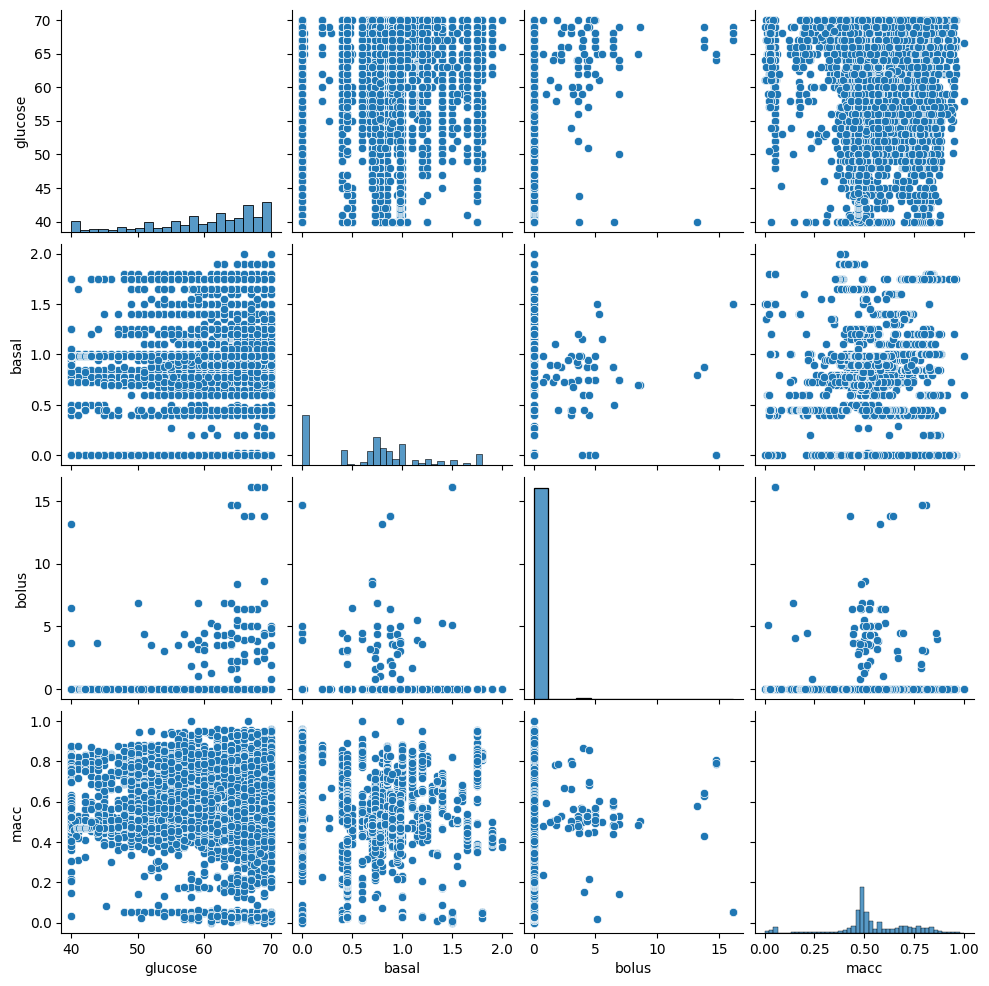

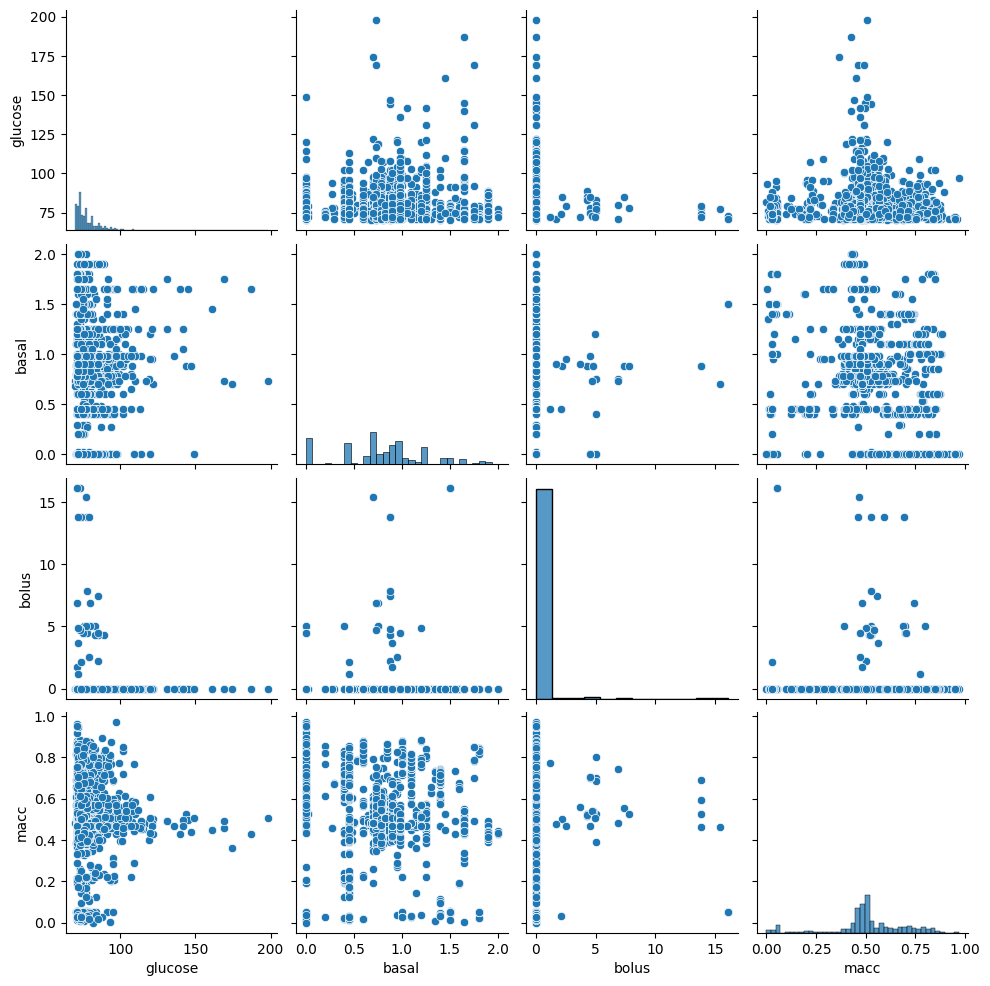

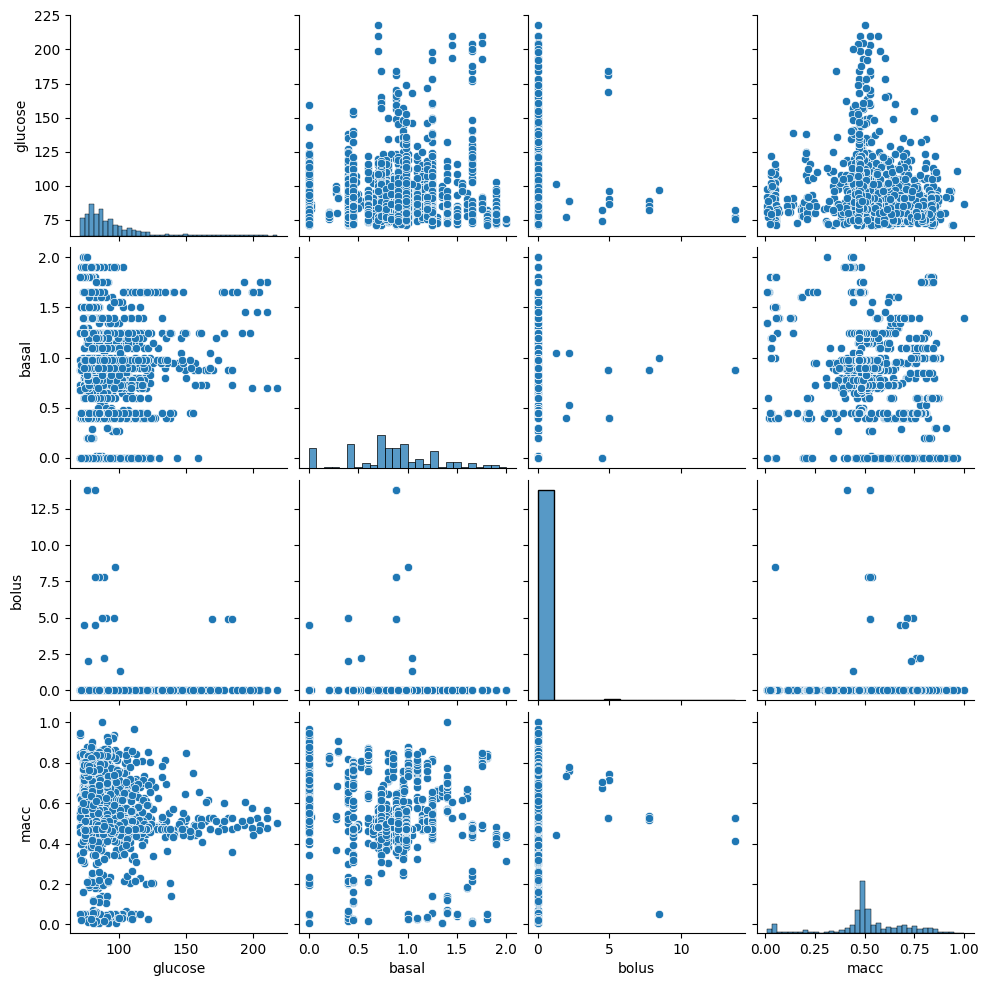

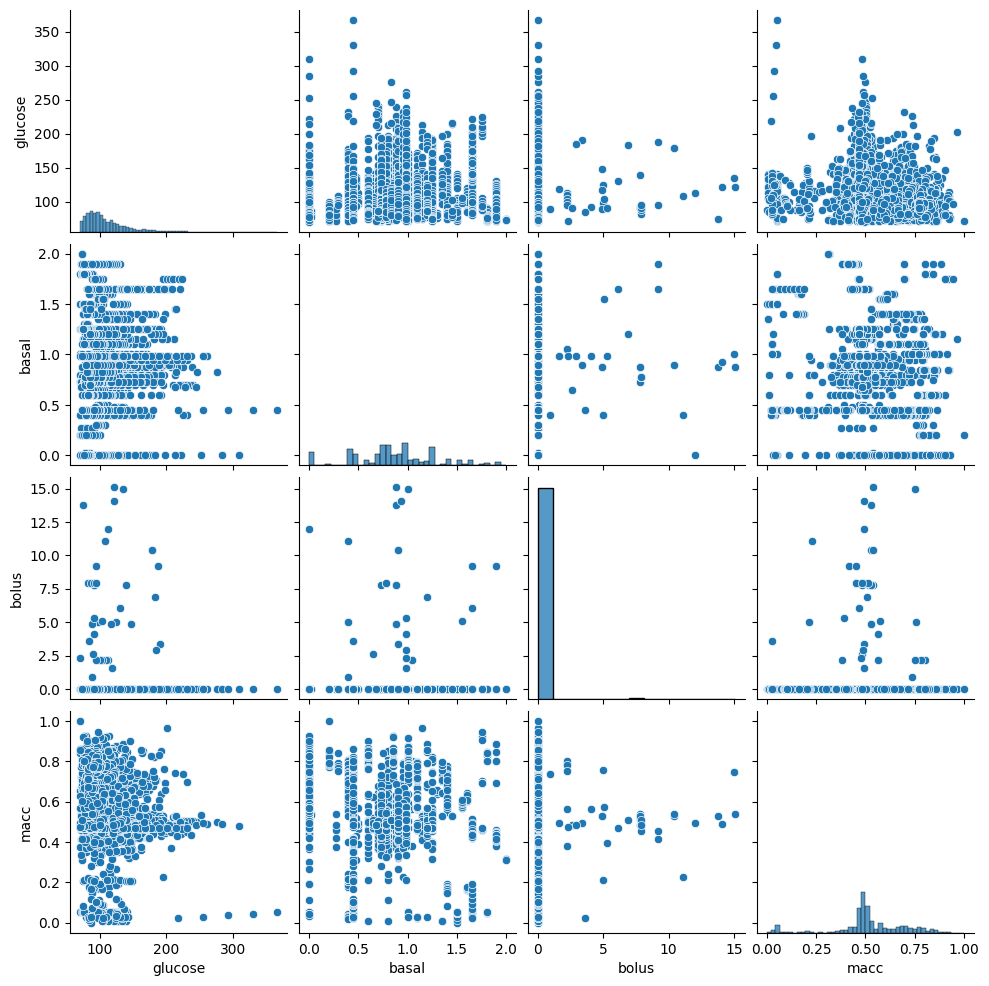

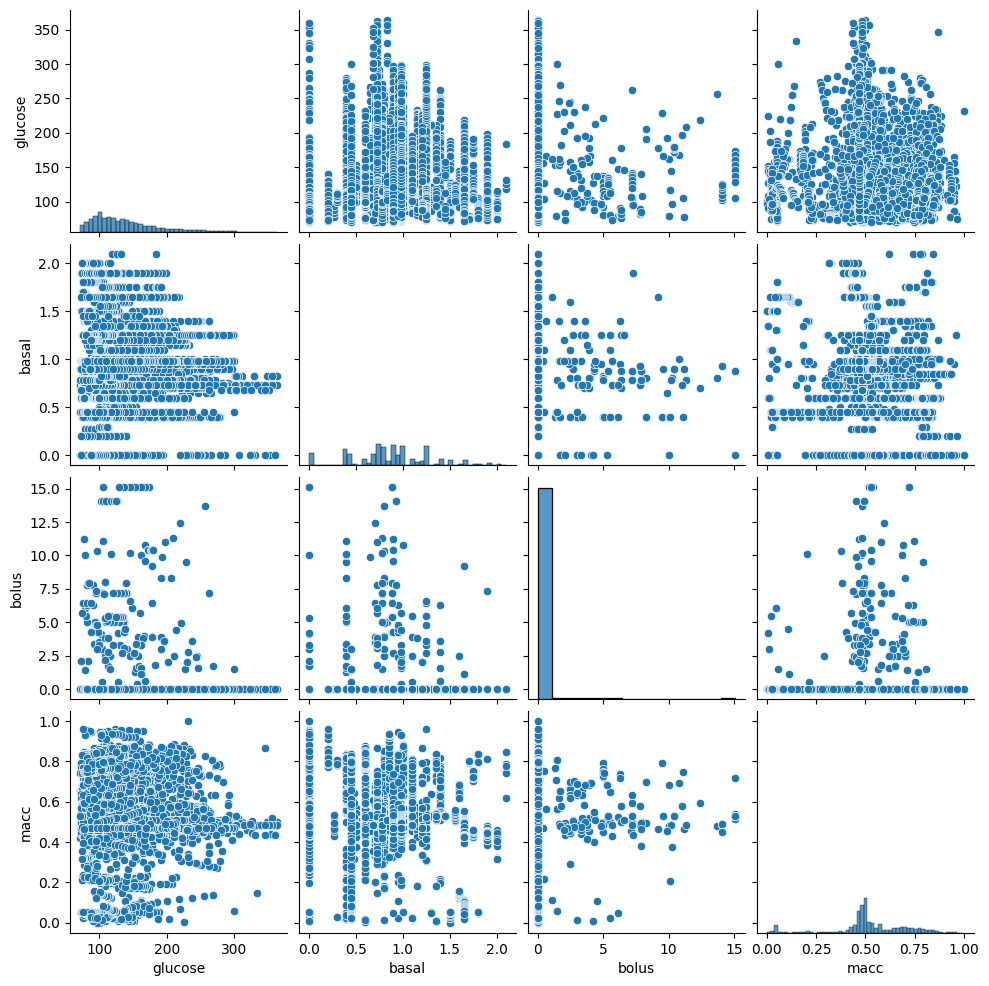

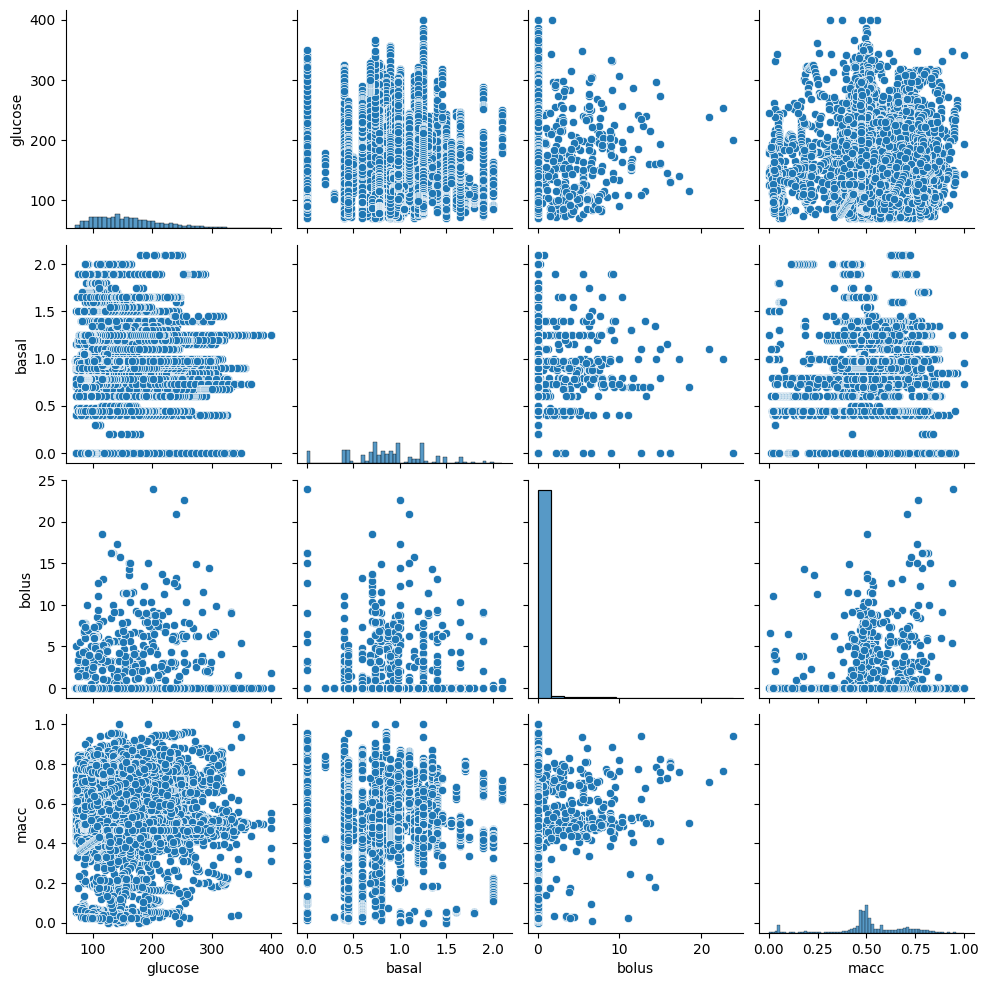

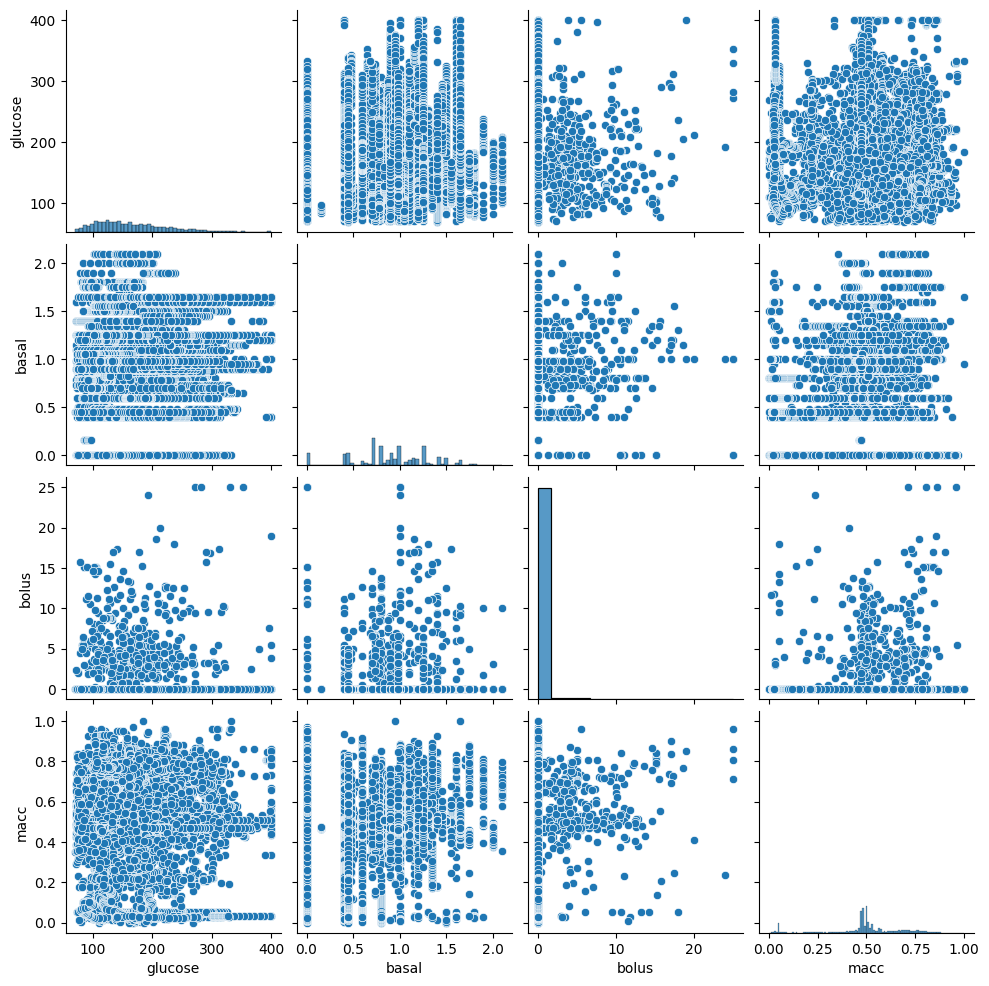

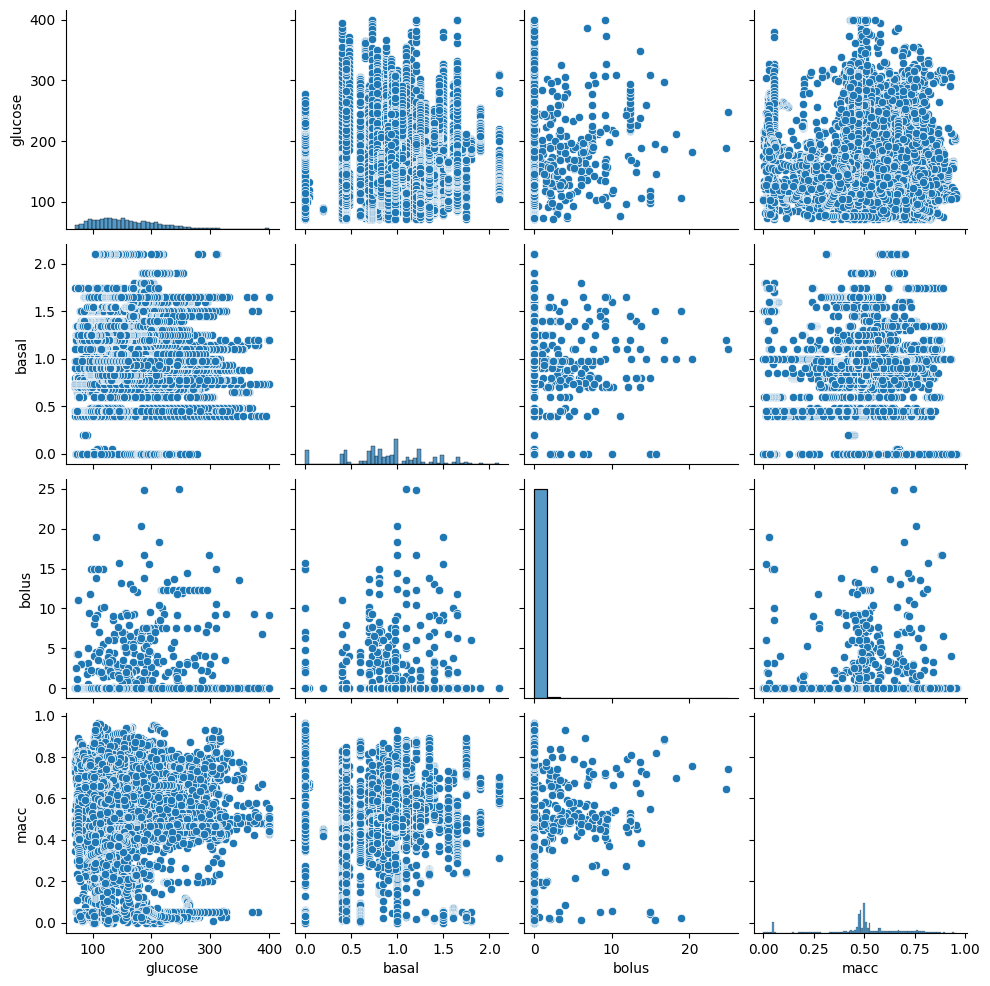

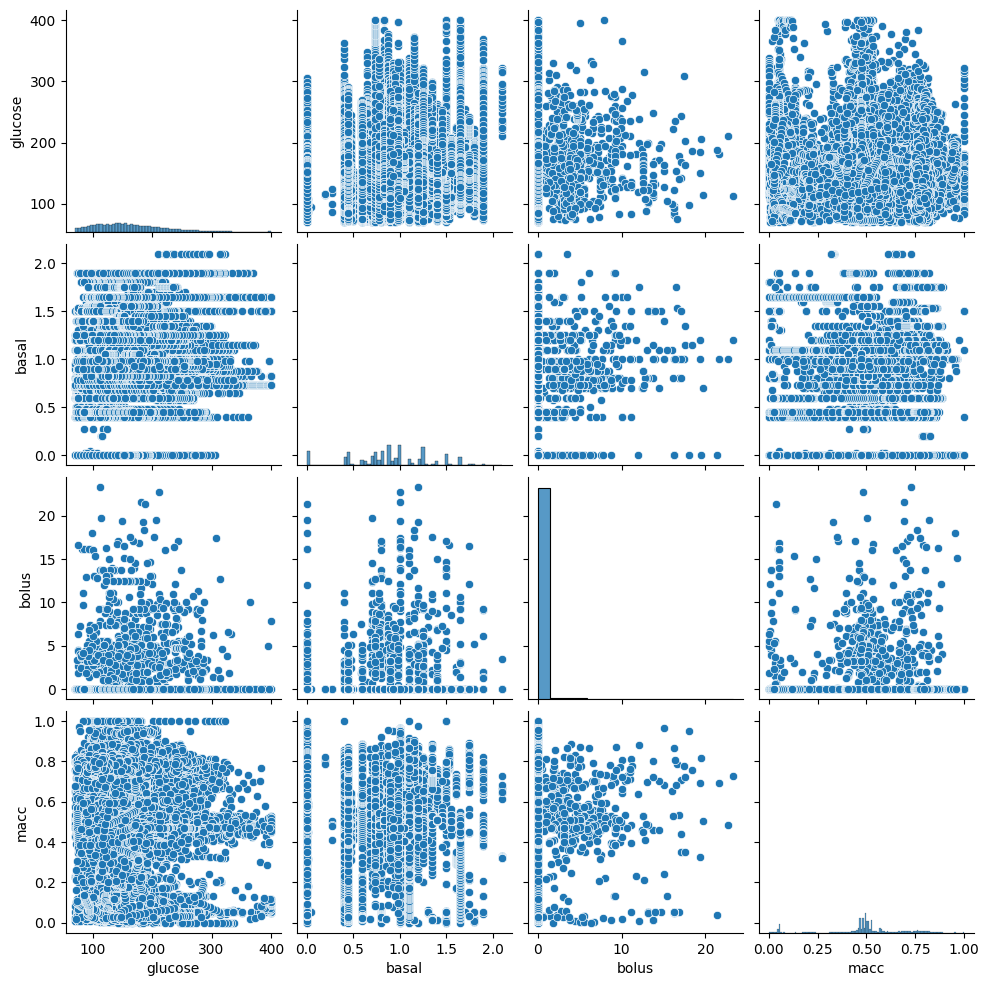

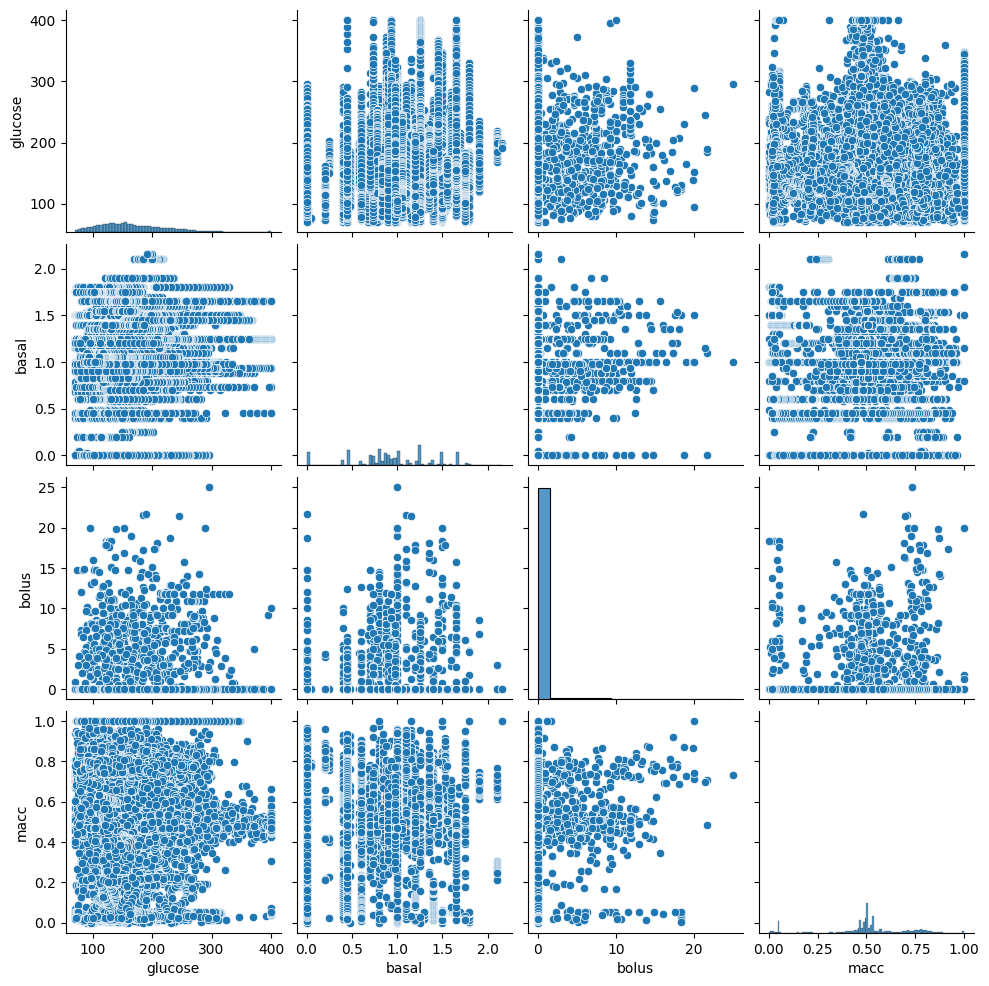

In [13]:
frames = []
classes = [0,1,2,3,4,5,6,7,8,9]
subject_IDs = ['540', '544', '552', '559', '563', '567','570', '575', '584', '588', '591', '596']
path = 'GAPS_DATA/TRAIN/'

for subject_ID in subject_IDs:
    # store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

    df_plot = (pd.read_csv(file) for file in csv_files)
    df_plot  = pd.concat(df_plot, ignore_index=True)
    df_plot["macc"] = df_plot["macc"].replace(-1, np.nan)
    df_plot = df_plot.dropna()
    frames.append(df_plot)
df_plot_list = pd.concat(frames, ignore_index=True)

for i in classes:
    ## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
    print('The class is class:', i)
    df = df_plot_list.copy()
    df = df.loc[df["Class"] == i]
    pairplots = sns.pairplot(df[['glucose', 'basal', 'bolus', 'macc']])
    file_name = "Correlations/Corr_%i.png" % (i)
    pairplots.savefig(file_name)
